In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

In [2]:
# import data
source_path = r"../src/data/LocalBusiness"
#source_path = r"C:\Users\chench10\Downloads" 
file = 'MFile_telephone_only_tmp'

df = pd.read_json(os.path.join(source_path, file), compression='gzip', orient='records', lines=True) 

In [3]:
df_copy = df.copy()

©: The dateset of matching entities using only normalized telephone numbers is created by Jannik and Marvin. 

### Cluster Cleansing

In [4]:
df =df_copy

<b> step 1: </b> Use more specific address information, e.g., <i>streetaddress</i>, for filtering 

In [5]:
def replace_list(iterator):
    if isinstance(iterator, list):
        return ' '.join(iterator)
    else:
        return iterator

In [6]:
df['streetaddress']=df['streetaddress'].apply(replace_list)
df['addresslocality']=df['addresslocality'].apply(replace_list)

In [7]:
tmp1 = pd.DataFrame(df.groupby('telephoneNorm')['streetaddress'].nunique()).reset_index()
tmp1.columns = ['telephoneNorm','Nstreetaddress']

tmp2 = pd.DataFrame(df.groupby('telephoneNorm')['addresslocality'].nunique()).reset_index()
tmp2.columns = ['telephoneNorm','Naddresslocality']

In [8]:
df_merge = df.merge(tmp1, on='telephoneNorm', how='left').merge(tmp2, on='telephoneNorm', how='left')
df1 = df_merge[(df_merge['Nstreetaddress']==1) & (df_merge['Naddresslocality']==1)]
df1
df1.drop(columns=['Nstreetaddress','Naddresslocality'], inplace=True)
df1.head()

/home/bizer-tp2021/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,row_id,name,address,page_url,addressregion,streetaddress,addresscountry,addresslocality,postalcode,origin,telephone,geo,sameas,latitude,longitude,phone_object,E.164 format,telephoneNorm,indexValue,MatchingNumbers
0,169,Volksbank,"{'addresscountry': 'AT', 'addresslocality': 'H...",https://www.kitzbueheler-alpen.com/en/hosa/inf...,None,Brixentaler Straße 28,AT,Hopfgarten im Brixental,6361,LocalBusiness_kitzbueheler-alpen.com_September...,0043 50 566,"{'longitude': '12.1580077', 'latitude': '47.44...",None,47.448100,12.158008,"{'country_code': 43, 'extension': None, 'natio...",4350566,4350566,190113,"[190267, 190113]"
1,396,Volksbank Tirol AG - Filiale Hopfgarten,"{'addresscountry': 'AT', 'addresslocality': 'H...",https://www.kitzbueheler-alpen.com/de/hosa/inf...,None,Brixentaler Straße 28,AT,Hopfgarten im Brixental,6361,LocalBusiness_kitzbueheler-alpen.com_September...,0043 50 566,"{'longitude': '12.1580077', 'latitude': '47.44...",None,47.448100,12.158008,"{'country_code': 43, 'extension': None, 'natio...",4350566,4350566,190267,"[190267, 190113]"
7,5860,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://whattoexpect.marriott.com/rommd,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.com_September2020.json.gz,+39 06 3684,"{'longitude': '12.4709710000000000', 'latitude...",None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,591585,"[591585, 589400, 587459]"
8,2275,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://www.marriott.com/hotels/travel/rommd-l...,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.com_September2020.json.gz,+39 06 3684,"{'longitude': '1.2470971E1', 'latitude': '4.19...",None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,589400,"[591585, 589400, 587459]"
9,3814,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://www.marriott.co.uk/hotels/travel/rommd...,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.co.uk_September2020.json.gz,+39 06 3684,"{'longitude': '1.2470971E1', 'latitude': '4.19...",None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,587459,"[591585, 589400, 587459]"


<b> step 2: </b> Group the data by <i>telephoneNorm</i>, and count the number of tables for each group, keep only the groups with records from at least two tables

In [9]:
tmp = pd.DataFrame(df.groupby('telephoneNorm')['origin'].nunique()).reset_index()
tmp.columns = ['telephoneNorm','Ntables']

In [10]:
df_merge = df1.merge(tmp, on='telephoneNorm', how='left')
df2 = df_merge[df_merge['Ntables']>1]
#df2 = df_merge[df_merge['Ntables']>0]
df2.drop(columns='Ntables', inplace=True)

/home/bizer-tp2021/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
df2.set_index('indexValue', drop=False,inplace=True)
df2

,row_id,name,address,page_url,addressregion,streetaddress,addresscountry,addresslocality,postalcode,origin,telephone,geo,sameas,latitude,longitude,phone_object,E.164 format,telephoneNorm,indexValue,MatchingNumbers
indexValue,,,,,,,,,,,,,,,,,,,,
591585,5860,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://whattoexpect.marriott.com/rommd,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.com_September2020.json.gz,+39 06 3684,"{'longitude': '12.4709710000000000', 'latitude...",None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,591585,"[591585, 589400, 587459]"
589400,2275,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://www.marriott.com/hotels/travel/rommd-l...,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.com_September2020.json.gz,+39 06 3684,"{'longitude': '1.2470971E1', 'latitude': '4.19...",None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,589400,"[591585, 589400, 587459]"
587459,3814,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://www.marriott.co.uk/hotels/travel/rommd...,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.co.uk_September2020.json.gz,+39 06 3684,"{'longitude': '1.2470971E1', 'latitude': '4.19...",None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,587459,"[591585, 589400, 587459]"
603078,3271,Courtyard Vienna Prater/Messe,"{'postalcode': '1020', 'streetaddress': 'Trabr...",https://www.marriott.com.au/hotels/hotel-infor...,None,Trabrennstrasse 4,AT,Vienna,1020,Hotel_marriott.com.au_September2020.json.gz,+43 1 72730,"{'longitude': '1.6412484E1', 'latitude': '4.82...",None,48.212960,16.412484,"{'country_code': 43, 'extension': None, 'natio...",43172730,43172730,603078,"[588671, 603078, 587177]"
588671,1005,Courtyard Vienna Prater/Messe,"{'postalcode': '1020', 'streetaddress': 'Trabr...",https://www.marriott.com/hotels/travel/viefg-c...,None,Trabrennstrasse 4,AT,Vienna,1020,Hotel_marriott.com_September2020.json.gz,+43 1 72730,"{'longitude': '1.6412484E1', 'latitude': '4.82...",None,48.212960,16.412484,"{'country_code': 43, 'extension': None, 'natio...",43172730,43172730,588671,"[588671, 603078, 587177]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576996,267,Romantik Hotel Landhaus Bärenmühle,"{'postalcode': '35110', 'addresslocality': 'Fr...",https://www.romantikhotels.com/en/hotels/roman...,None,Bärenmühle,DE,Frankenau-Ellershausen,35110,Hotel_romantikhotels.com_September2020.json.gz,+49 (6455) 6429692,"{'latitude': '51.09581', 'longitude': '8.89993...",None,51.095810,8.899933,"{'country_code': 49, 'extension': None, 'natio...",494964556429692,494964556429692,576996,"[569931, 572045, 576996, 577025, 577156, 57721..."
572045,111,Romantik Hotel Landhaus Bärenmühle,"{'postalcode': '35110', 'addresslocality': 'Fr...",https://www.chateauxhotels.com/romantik-hotel-...,None,Bärenmühle,DE,Frankenau-Ellershausen,35110,Hotel_chateauxhotels.com_September2020.json.gz,+49 (6455) 6429692,"{'longitude': '8.8999334', 'latitude': '51.095...",None,51.095810,8.899933,"{'country_code': 49, 'extension': None, 'natio...",494964556429692,494964556429692,572045,"[569931, 572045, 576996, 577025, 577156, 57721..."
577025,357,Romantik Hotel Landhaus Bärenmühle,"{'postalcode': '35110', 'addresslocality': 'Fr...",https://www.romantikhotels.com/en/hotels/roman...,None,Bärenmühle,DE,Frankenau-Ellershausen,35110,Hotel_romantikhotels.com_September2020.json.gz,+49 (6455) 6429692,"{'latitude': '51.09581', 'longitude': '8.89993...",None,51.095810,8.899933,"{'country_code': 49, 'extension': None, 'natio...",494964556429692,494964556429692,577025,"[569931, 572045, 576996, 577025, 577156, 57721..."


<b> step 3: </b>  Additional filtering using geo location

In [12]:
def calcDifference(pointOne, pointTwo):
    return geopy.distance.great_circle(pointOne, pointTwo).km

def calcDifferenceFromRow (row, data):
    indexValue = row.indexValue
    indexPosition = (row[lat], row[lon])
    diffList = []
#     for value in row['MatchingGeoPoints']:
#         if not value in tmp.index:
#             continue
    for value in row['MatchingNumbers']:
        currRow = data.loc[value]
        currIndex = currRow['indexValue']
        if currIndex == indexValue:
            diffList.append(-1)
        else:            
            currPosition = (currRow[lat], currRow[lon])
            diffList.append(calcDifference(indexPosition, currPosition))
    return diffList


def keepCloseMatches(row, threshold):
    return np.array(row['MatchingNumbers'])[np.array(row['distance'])<=threshold]

In [13]:
lat = 'latitude'
lon = 'longitude'

check_list = ['latitude', 'longitude', 'indexValue']
for l in check_list:
    df2[l]=df2[l].apply(replace_list)
df2['distance'] = df2.apply(calcDifferenceFromRow, args=(df2, ), axis=1)

<ipython-input-13-dd7073354295>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[l]=df2[l].apply(replace_list)
<ipython-input-13-dd7073354295>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['distance'] = df2.apply(calcDifferenceFromRow, args=(df2, ), axis=1)


In [14]:
df2_copy = df2.copy()
df2['MatchingNumbers_New'] = df2.apply(keepCloseMatches, args=(0.05,), axis=1)

<ipython-input-14-1179f376bfb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MatchingNumbers_New'] = df2.apply(keepCloseMatches, args=(0.05,), axis=1)


In [15]:
# df2.to_json('df2_backup', compression='gzip', orient='records', lines=True)

### Clusters
#### Cluster Statistics

In [16]:
class EntityCluster():
    """
    create culsters and generate summary statistics for each entity tpye
    """
    
    def __init__(self, name, df=None, id_col='telephoneNorm'):
        self.name = name
        self.df = df
        self.id_col = id_col
        
        self._create_clusters()
        
    @staticmethod
    def _helperfunc(iterator, cluster, id_col='telephoneNorm', val_col='MatchingNumbers_New'):
        key = iterator[id_col]
        val = iterator[val_col]
        cluster[key] = cluster[key].union(set(val))
        
        return cluster
        
        
    def _create_clusters(self):
        """
        create clusters and use the column value as the cluster identifier
        """
        df = self.df
        id_col = self.id_col
        
        # intialize the cluster
        if not df is None:
            cluster_ids = df[id_col].unique()
            cluster = {key: set([]) for key in cluster_ids}
            # add elements to the cluster
            cluster = df.apply(EntityCluster._helperfunc, args=(cluster,), axis=1)[0]
        else:
            cluster = None
        
        self.cluster = cluster
        
    
    def get_cluster(self):
        return self.cluster
                                                                            

    def create_cluster_statistics(self, *args):
        cluster = self.cluster
        # create a dataframe for data storage
        tmp = {}
        for key, val in cluster.items():
            tmp[key] = len(val)
            
        df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
        df_clusters.sort_values('frequency', ascending=False, inplace=True)
            
        return df_clusters['frequency'].describe()
      
    
    def plot_histogram(self, min_=None, max_=None, bins=None, *args): 
    
        cluster = self.cluster
        name =self.name
        # create a dataframe for data storage
        tmp = {}
        for key, val in cluster.items():
            tmp[key] = len(val)
            
        df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
        df_clusters.sort_values('frequency', ascending=False, inplace=True)
        
        # plot the histogram
        if min_ is None: 
            min_ = df_clusters.frequency.quantile(0.95) 
        if max_ is None: 
            max_ = df_clusters.frequency.max()
        if bins is None:
            bins = int((max_ - min_)/10)
            
        figure, ax= plt.subplots(figsize=(10,3))
        subset = df_clusters[(df_clusters.frequency> min_)&(df_clusters.frequency< max_)].frequency
        xint = range(math.floor(min_), math.ceil(max_)+1)
        plt.xticks(xint)
        plt.title(name)
        plt.xlabel('Cluster Size')
        plt.hist(subset, bins=bins)

In [17]:
df2

,row_id,name,address,page_url,addressregion,streetaddress,addresscountry,addresslocality,postalcode,origin,...,sameas,latitude,longitude,phone_object,E.164 format,telephoneNorm,indexValue,MatchingNumbers,distance,MatchingNumbers_New
indexValue,,,,,,,,,,,,,,,,,,,,,
591585,5860,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://whattoexpect.marriott.com/rommd,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.com_September2020.json.gz,...,None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,591585,"[591585, 589400, 587459]","[-1, 0.0, 0.0]","[591585, 589400, 587459]"
589400,2275,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://www.marriott.com/hotels/travel/rommd-l...,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.com_September2020.json.gz,...,None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,589400,"[591585, 589400, 587459]","[0.0, -1, 0.0]","[591585, 589400, 587459]"
587459,3814,Le Méridien Visconti Rome,"{'addresslocality': 'Rome', 'postalcode': '001...",https://www.marriott.co.uk/hotels/travel/rommd...,None,Via Federico Cesi 37,IT,Rome,00193,Hotel_marriott.co.uk_September2020.json.gz,...,None,41.907464,12.470971,"{'country_code': 39, 'extension': None, 'natio...",39063684,39063684,587459,"[591585, 589400, 587459]","[0.0, 0.0, -1]","[591585, 589400, 587459]"
603078,3271,Courtyard Vienna Prater/Messe,"{'postalcode': '1020', 'streetaddress': 'Trabr...",https://www.marriott.com.au/hotels/hotel-infor...,None,Trabrennstrasse 4,AT,Vienna,1020,Hotel_marriott.com.au_September2020.json.gz,...,None,48.212960,16.412484,"{'country_code': 43, 'extension': None, 'natio...",43172730,43172730,603078,"[588671, 603078, 587177]","[0.0, -1, 0.0]","[588671, 603078, 587177]"
588671,1005,Courtyard Vienna Prater/Messe,"{'postalcode': '1020', 'streetaddress': 'Trabr...",https://www.marriott.com/hotels/travel/viefg-c...,None,Trabrennstrasse 4,AT,Vienna,1020,Hotel_marriott.com_September2020.json.gz,...,None,48.212960,16.412484,"{'country_code': 43, 'extension': None, 'natio...",43172730,43172730,588671,"[588671, 603078, 587177]","[-1, 0.0, 0.0]","[588671, 603078, 587177]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576996,267,Romantik Hotel Landhaus Bärenmühle,"{'postalcode': '35110', 'addresslocality': 'Fr...",https://www.romantikhotels.com/en/hotels/roman...,None,Bärenmühle,DE,Frankenau-Ellershausen,35110,Hotel_romantikhotels.com_September2020.json.gz,...,None,51.095810,8.899933,"{'country_code': 49, 'extension': None, 'natio...",494964556429692,494964556429692,576996,"[569931, 572045, 576996, 577025, 577156, 57721...","[3.335852546135437e-05, 3.335852546135437e-05,...","[569931, 572045, 576996, 577025, 577156, 57721..."
572045,111,Romantik Hotel Landhaus Bärenmühle,"{'postalcode': '35110', 'addresslocality': 'Fr...",https://www.chateauxhotels.com/romantik-hotel-...,None,Bärenmühle,DE,Frankenau-Ellershausen,35110,Hotel_chateauxhotels.com_September2020.json.gz,...,None,51.095810,8.899933,"{'country_code': 49, 'extension': None, 'natio...",494964556429692,494964556429692,572045,"[569931, 572045, 576996, 577025, 577156, 57721...","[0.0, -1, 3.335852546135437e-05, 3.33585254613...","[569931, 572045, 576996, 577025, 577156, 57721..."
577025,357,Romantik Hotel Landhaus Bärenmühle,"{'postalcode': '35110', 'addresslocality': 'Fr...",https://www.romantikhotels.com/en/hotels/roman...,None,Bärenmühle,DE,Frankenau-Ellershausen,35110,Hotel_romantikhotels.com_September2020.json.gz,...,None,51.095810,8.899933,"{'country_code': 49, 'extension': None, 'natio...",494964556429692,494964556429692,577025,"[569931, 572045, 576996, 577025, 577156, 57721...","[3.335852546135437e-05, 3.335852546135437e-05,...","[569931, 572045, 576996, 577025, 577156, 57721..."


In [18]:
df_filtered = df2.reset_index(drop=True)

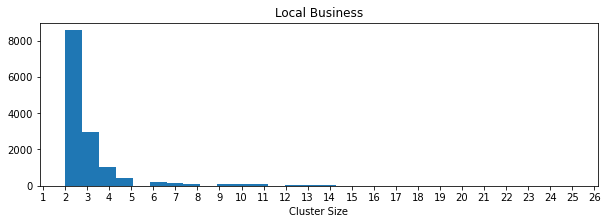

In [19]:
LocalBusiness = EntityCluster('Local Business', df_filtered)
cluster_statistics_LB = LocalBusiness.create_cluster_statistics()
cluster_plot_LB = LocalBusiness.plot_histogram(min_=0, max_=30, bins=30)

In [20]:
cluster_statistics_LB

count    13863.000000
mean         2.891005
std          1.840296
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: frequency, dtype: float64

#### Distribution of Matching Entities over Tables 

In [21]:
# create a dataframe storing cluster ids
numbers = df_filtered['telephoneNorm'].unique()

dict_id = {}
i = 1
for number in numbers:
    dict_id[number] = i
    i += 1

tmp = pd.DataFrame.from_dict(dict_id, orient='index')
tmp.reset_index(inplace=True)
tmp.columns = ['telephoneNorm','cluster id']

In [22]:
df_clean = df_filtered.merge(tmp, on='telephoneNorm')[['cluster id','origin','row_id','page_url']]
df_clean.columns = ['cluster_id','table_id','row_id','page_url']

In [23]:
#df_clean.to_json('MFile_cleaned', compression='gzip', orient='records', lines=True)

In [24]:
df_clean.head(10)

,cluster_id,table_id,row_id,page_url
0,1,Hotel_marriott.com_September2020.json.gz,5860,https://whattoexpect.marriott.com/rommd
1,1,Hotel_marriott.com_September2020.json.gz,2275,https://www.marriott.com/hotels/travel/rommd-l...
2,1,Hotel_marriott.co.uk_September2020.json.gz,3814,https://www.marriott.co.uk/hotels/travel/rommd...
3,2,Hotel_marriott.com.au_September2020.json.gz,3271,https://www.marriott.com.au/hotels/hotel-infor...
4,2,Hotel_marriott.com_September2020.json.gz,1005,https://www.marriott.com/hotels/travel/viefg-c...
5,2,Hotel_marriott.co.uk_September2020.json.gz,3501,https://www.marriott.co.uk/hotels/hotel-deals/...
6,3,Hotel_marriott.com_September2020.json.gz,4405,https://whattoexpect.marriott.com/vieil
7,3,Hotel_marriott.com_September2020.json.gz,458,https://www.marriott.com/hotels/fact-sheet/tra...
8,3,Hotel_marriott.co.uk_September2020.json.gz,343,https://www.marriott.co.uk/hotels/hotel-inform...
9,4,Hotel_marriott.com.au_September2020.json.gz,2736,https://www.marriott.com.au/hotels/hotel-photo...


In [25]:
tmp = pd.DataFrame(df_clean.groupby(['cluster_id'])['table_id'].nunique()).reset_index()
tmp.columns = ['cluster_id','clusterNtables']
df_final = df_clean.merge(tmp, on='cluster_id', how='left')

In [26]:
tmp = pd.DataFrame(df_final.groupby(['table_id'])['cluster_id'].nunique()).reset_index()
tmp.columns = ['table_id','tableNclusters']
df_final = df_final.merge(tmp, on='table_id', how='left').sort_values(by='tableNclusters', ascending=False)

In [27]:
# df_final.to_json('MFile_cleaned_v1', compression='gzip', orient='records', lines=True)

In [28]:
df_final

,cluster_id,table_id,row_id,page_url,clusterNtables,tableNclusters
0,1,Hotel_marriott.com_September2020.json.gz,5860,https://whattoexpect.marriott.com/rommd,2,3082
17568,6166,Hotel_marriott.com_September2020.json.gz,8775,https://www.marriott.com/hotels/hotel-photos/m...,2,3082
17534,6154,Hotel_marriott.com_September2020.json.gz,3984,https://www.marriott.com/hotels/travel/sfowi-t...,2,3082
17536,6154,Hotel_marriott.com_September2020.json.gz,8814,https://whattoexpect.marriott.com/sfowi,2,3082
17537,6155,Hotel_marriott.com_September2020.json.gz,8631,https://whattoexpect.marriott.com/sfobg,4,3082
...,...,...,...,...,...,...
29648,10051,Restaurant_loseille-bourse.com_September2020.j...,21,https://www.loseille-bourse.com/zh/,2,1
9589,3473,Restaurant_beaumontcvb.com_September2020.json.gz,97,https://www.beaumontcvb.com/listing/golden-cor...,2,1
35842,12287,LocalBusiness_businessesforsaledorset.co.uk_Se...,102,https://businessesforsaledorset.co.uk/business...,2,1
9600,3476,Restaurant_oceancity.com_September2020.json.gz,25,https://www.oceancity.com/dir/restaurants-and-...,2,1


Text(0, 0.5, 'number of clusters')

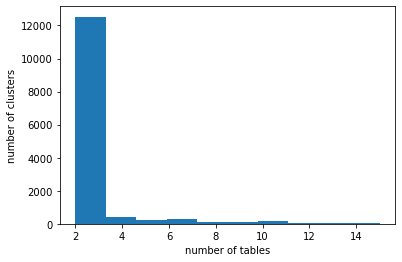

In [29]:
unique_cluster =df_final.drop_duplicates('cluster_id', keep='first')

plt.hist(unique_cluster['clusterNtables'])
plt.xlabel('number of tables')
plt.ylabel('number of clusters')

Text(0, 0.5, 'number of tables')

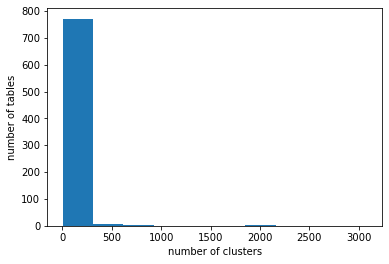

In [30]:
unique_table =df_final.drop_duplicates('table_id', keep='first')[['table_id', 'tableNclusters']]

plt.hist(unique_table['tableNclusters'])
plt.xlabel('number of clusters')
plt.ylabel('number of tables')

In [31]:
unique_table[:35]

,table_id,tableNclusters
0,Hotel_marriott.com_September2020.json.gz,3082
9525,Hotel_marriott.co.uk_September2020.json.gz,2715
8871,Hotel_marriott.com.au_September2020.json.gz,2144
33876,Restaurant_bookatable.com_September2020.json.gz,1897
36276,Restaurant_bookatable.co.uk_September2020.json.gz,1867
11975,LocalBusiness_bimmershops.com_September2020.js...,1234
15550,LocalBusiness_fourringsrepair.com_September202...,931
27299,LocalBusiness_benzshops.com_September2020.json.gz,901
7795,LocalBusiness_minirepairshops.com_September202...,842
3307,LocalBusiness_vcarshops.com_September2020.json.gz,833


## Phase1b: Table and Entity Selection

In [32]:
#all_candidates = np.array(unique_table['table_id'])
table_candidates = unique_table['table_id'].iloc[:15].tolist()

In [33]:
table_candidates

['Hotel_marriott.com_September2020.json.gz',
 'Hotel_marriott.co.uk_September2020.json.gz',
 'Hotel_marriott.com.au_September2020.json.gz',
 'Restaurant_bookatable.com_September2020.json.gz',
 'Restaurant_bookatable.co.uk_September2020.json.gz',
 'LocalBusiness_bimmershops.com_September2020.json.gz',
 'LocalBusiness_fourringsrepair.com_September2020.json.gz',
 'LocalBusiness_benzshops.com_September2020.json.gz',
 'LocalBusiness_minirepairshops.com_September2020.json.gz',
 'LocalBusiness_vcarshops.com_September2020.json.gz',
 'LocalBusiness_pcarshops.com_September2020.json.gz',
 'LocalBusiness_homify.co.uk_September2020.json.gz',
 'LocalBusiness_volvomechanics.com_September2020.json.gz',
 'LocalBusiness_lrshops.com_September2020.json.gz',
 'LocalBusiness_homify.com_September2020.json.gz']

In [34]:
# initialize a dictionary to store cluster frequency
cluster_fre = {key: 0 for key in range(27161)}

for t in table_candidates:
    clusters = df_final[df_final['table_id']==t]['cluster_id'].unique()
    for c in clusters:
        cluster_fre[c] += 1

In [35]:
results =pd.DataFrame.from_dict(cluster_fre, orient='index', columns=['frequency']).sort_values('frequency', ascending=False)
results.iloc[:500]

,frequency
7047,8
4441,8
2682,8
5817,8
9791,8
...,...
2931,6
5876,6
8156,6
2780,6
